# WeatherPy
----

### Analysis
* There is a negative relationship between (max) temperature and latitude in northern hemisphere. As expected, the max temperature decreases when a city or a place is away from the equator, which is also the same case in southern hemisphere. However, the relationship between (max) temperature and latitude in southern hemisphere is positive since the latitudes are increasing to approach the equator while the latitudes are decreasing to get closer to the equator for cities in northern hemisphere.
* There is stronger relationship between humidity (%) and latitude in northern hemisphere when compares with the data in southern hemisphere. In northern hemisphere, the humidity percentage increases as the latitude increases as well (the trend is quite obvious and clear). Nevertheless, such trend becomes less obvious in southern hemisphere
* The relationship between wind speed and latitude is quite weak, since the r values for both hemispheres data are quite small, and not even reaches 0.5 or -0.5. This indicates that latitude may not be a strong influencer for wind speed, and usually air pressures could have a greater (or even the greatest) effect on wind speed. Therefore, if we want to explore what other indicators can affect the wind speed, extra analysis could be conducted.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

api_key = api_keys.api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
# Build URL and request your results in F with the API key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 

CityName = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

# Initialize the number and set 

X = 1
SetCount = 1

# Start printing

print(f"Beginning Data Retrieval")
print(f"-------------------------")

#Loop through the cities in the city list and create another set when the number of city reaches a specific number

for city in cities:  
    
    if X > 58:
        
        SetCount = SetCount + 1
        X = 1
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        CityName.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        MaxTemp.append(response["main"]["temp_max"])
        WindSpeed.append(response["wind"]["speed"])
        CityNameRecord = response["name"]
        print(f"Processing Record {X} of set {SetCount} | {CityNameRecord}")
                
        # Increase number of record by one each time
        
        X = X + 1
        
    except:
        print("City not found. Skipping...")

# Finish printing

print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of set 1 | Coahuayana Viejo
Processing Record 2 of set 1 | Cape Town
Processing Record 3 of set 1 | Vila Velha
Processing Record 4 of set 1 | Lagoa
Processing Record 5 of set 1 | Carnarvon
Processing Record 6 of set 1 | Saldanha
Processing Record 7 of set 1 | Kapaa
Processing Record 8 of set 1 | Jamestown
Processing Record 9 of set 1 | Butaritari
Processing Record 10 of set 1 | Hermanus
Processing Record 11 of set 1 | Barrow
City not found. Skipping...
Processing Record 12 of set 1 | Coquimbo
Processing Record 13 of set 1 | Rikitea
Processing Record 14 of set 1 | New Norfolk
Processing Record 15 of set 1 | Puerto Ayora
Processing Record 16 of set 1 | Isangel
Processing Record 17 of set 1 | Punta Arenas
Processing Record 18 of set 1 | Vaini
Processing Record 19 of set 1 | Saint George
City not found. Skipping...
Processing Record 20 of set 1 | Torbay
Processing Record 21 of set 1 | Tasiilaq
Processing Record 22 of se

Processing Record 13 of set 4 | Niagara Falls
Processing Record 14 of set 4 | Balkhash
Processing Record 15 of set 4 | Hasilpur
Processing Record 16 of set 4 | Geraldton
Processing Record 17 of set 4 | Beloha
Processing Record 18 of set 4 | Boa Vista
Processing Record 19 of set 4 | College
Processing Record 20 of set 4 | Upernavik
Processing Record 21 of set 4 | Erenhot
Processing Record 22 of set 4 | Faanui
Processing Record 23 of set 4 | Guapí
Processing Record 24 of set 4 | Kyzyl-Suu
Processing Record 25 of set 4 | Hamilton
Processing Record 26 of set 4 | Ternate
Processing Record 27 of set 4 | Saint-Pierre
Processing Record 28 of set 4 | Cabedelo
City not found. Skipping...
Processing Record 29 of set 4 | Shimokizukuri
Processing Record 30 of set 4 | Boajibu
City not found. Skipping...
Processing Record 31 of set 4 | Zhangye
Processing Record 32 of set 4 | Omboué
Processing Record 33 of set 4 | Zaysan
Processing Record 34 of set 4 | Houma
Processing Record 35 of set 4 | São Filipe


Processing Record 28 of set 7 | Maraã
Processing Record 29 of set 7 | Santa Isabel
Processing Record 30 of set 7 | Ilek
Processing Record 31 of set 7 | Talnakh
Processing Record 32 of set 7 | Parkersburg
Processing Record 33 of set 7 | Cam Ranh
Processing Record 34 of set 7 | Camacha
Processing Record 35 of set 7 | Maningrida
Processing Record 36 of set 7 | Kavaratti
Processing Record 37 of set 7 | Kyabé
Processing Record 38 of set 7 | Katherine
Processing Record 39 of set 7 | Phan Thiet
Processing Record 40 of set 7 | Lincoln
Processing Record 41 of set 7 | Chitipa
Processing Record 42 of set 7 | Ambulu
Processing Record 43 of set 7 | Te Anau
Processing Record 44 of set 7 | Lata
Processing Record 45 of set 7 | Kazlų Rūda
Processing Record 46 of set 7 | San Javier
Processing Record 47 of set 7 | Saqqez
Processing Record 48 of set 7 | Aberdeen
Processing Record 49 of set 7 | Bubaque
Processing Record 50 of set 7 | Pascagoula
Processing Record 51 of set 7 | Alofi
Processing Record 52 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# Display the dataframe

WeatherData = pd.DataFrame({
    
    "City":CityName,
    "Cloudiness":Cloudiness,
    "Country":Country,
    "Date":Date,
    "Humidity":Humidity,
    "Latitude":Lat,
    "Longtitude":Lng,
    "Maximum Temperature":MaxTemp,
    "Wind Speed":WindSpeed
})

WeatherData.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longtitude,Maximum Temperature,Wind Speed
0,Coahuayana Viejo,5,MX,1604709811,69,18.73,-103.68,78.80,11.41
1,Cape Town,40,ZA,1604709799,87,-33.93,18.42,59.00,13.87
2,Vila Velha,90,BR,1604709811,88,-20.33,-40.29,73.40,9.17
3,Lagoa,77,PT,1604709812,69,39.05,-27.98,58.46,30.65
4,Carnarvon,90,AU,1604709812,88,-24.87,113.63,73.40,17.22


In [40]:
# Check the data type and make sure the column numbers are the same

WeatherData.count()

City                   532
Cloudiness             532
Country                532
Date                   532
Humidity               532
Latitude               532
Longtitude             532
Maximum Temperature    532
Wind Speed             532
dtype: int64

In [41]:
WeatherData.dtypes

City                    object
Cloudiness               int64
Country                 object
Date                     int64
Humidity                 int64
Latitude               float64
Longtitude             float64
Maximum Temperature    float64
Wind Speed             float64
dtype: object

In [42]:
# Exporting the data to a csv file

WeatherData.to_csv("WeatherDataAnalysis.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

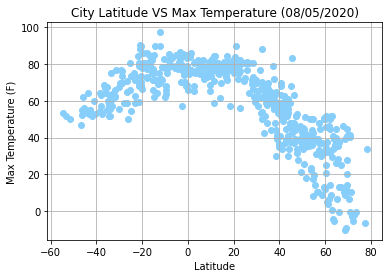

In [43]:
# Define the dependent and independent variables

Latitude = WeatherData["Latitude"]
Temperature = WeatherData["Maximum Temperature"]

# Create the scatter plot and formatting

plt.scatter(Latitude, Temperature, facecolor = "lightskyblue")
plt.title("City Latitude VS Max Temperature (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Figures/Figure1.png")
plt.show()

#### Latitude vs. Humidity Plot

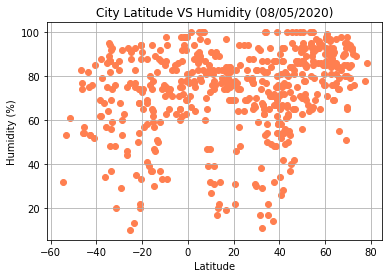

In [44]:
# Define the dependent and independent variables

Latitude = WeatherData["Latitude"]
Humudity = WeatherData["Humidity"]

# Create the scatter plot and formatting

plt.scatter(Latitude, Humidity, facecolor = "coral")
plt.title("City Latitude VS Humidity (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Figures/Figure2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

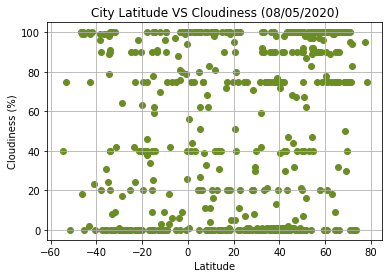

In [45]:
# Define the dependent and independent variables

Latitude = WeatherData["Latitude"]
Cloudiness = WeatherData["Cloudiness"]

# Create the scatter plot and formatting

plt.scatter(Latitude, Cloudiness, facecolor = "olivedrab")
plt.title("City Latitude VS Cloudiness (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Figures/Figure3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

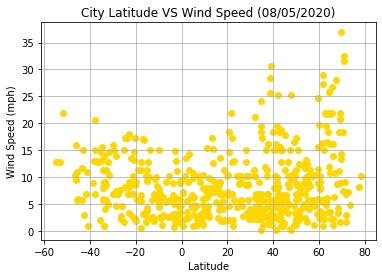

In [46]:
# Define the dependent and independent variables

Latitude = WeatherData["Latitude"]
WindSpeed = WeatherData["Wind Speed"]

# Create the scatter plot and formatting

plt.scatter(Latitude, WindSpeed, facecolor = "gold")
plt.title("City Latitude VS Wind Speed (08/05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Figures/Figure4.png")
plt.show()

In [47]:
# Use the equator as the division of Northern and Southern Hemispheres

NorthernHem = WeatherData[WeatherData["Latitude"]>0]
SouthernHem = WeatherData[WeatherData["Latitude"]<0]

In [48]:
import scipy.stats as st

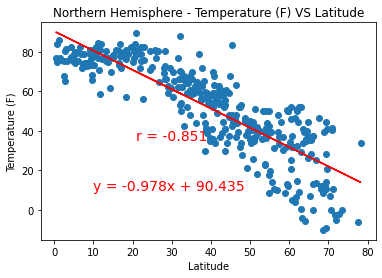

In [50]:
Latitude = NorthernHem["Latitude"]
Temperature = NorthernHem["Maximum Temperature"]

slope,intercept,rvalue,pvalue,stderr = st.linregress(Latitude, Temperature)
Regress_value = slope * Latitude + intercept
Equation = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
R = "r = " + str(round(rvalue,3))

plt.scatter(Latitude,Temperature)
plt.plot(Latitude,Regress_value,color = "red")
plt.annotate(Equation,(10,10),fontsize = 14,color = "red")
plt.annotate(R,(21,35),fontsize = 14,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere - Temperature (F) VS Latitude")
plt.savefig("Figures/Figure5.png")
plt.show()

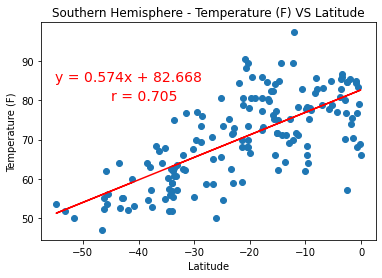

In [51]:
Latitude = SouthernHem["Latitude"]
Temperature = SouthernHem["Maximum Temperature"]

slope,intercept,rvalue,pvalue,stderr = st.linregress(Latitude, Temperature)
Regress_value = slope * Latitude + intercept
Equation = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
R = "r = " + str(round(rvalue,3))

plt.scatter(Latitude,Temperature)
plt.plot(Latitude,Regress_value,color = "red")
plt.annotate(Equation,(-55,85),fontsize = 14,color = "red")
plt.annotate(R,(-45,80),fontsize = 14,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere - Temperature (F) VS Latitude")
plt.savefig("Figures/Figure6.png")
plt.show()

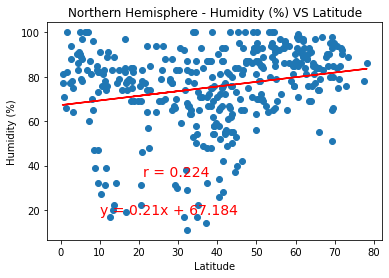

In [52]:
Latitude = NorthernHem["Latitude"]
Humidity = NorthernHem["Humidity"]

slope,intercept,rvalue,pvalue,stderr = st.linregress(Latitude, Humidity)
Regress_value = slope * Latitude + intercept
Equation = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
R = "r = " + str(round(rvalue,3))

plt.scatter(Latitude,Humidity)
plt.plot(Latitude,Regress_value,color = "red")
plt.annotate(Equation,(10,18),fontsize = 14,color = "red")
plt.annotate(R,(21,35),fontsize = 14,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) VS Latitude")
plt.savefig("Figures/Figure7.png")
plt.show()

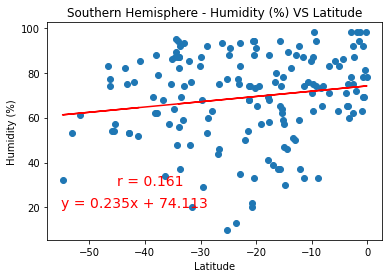

In [54]:
Latitude = SouthernHem["Latitude"]
Humidity = SouthernHem["Humidity"]

slope,intercept,rvalue,pvalue,stderr = st.linregress(Latitude, Humidity)
Regress_value = slope * Latitude + intercept
Equation = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
R = "r = " + str(round(rvalue,3))

plt.scatter(Latitude,Humidity)
plt.plot(Latitude,Regress_value,color = "red")
plt.annotate(Equation,(-55,20),fontsize = 14,color = "red")
plt.annotate(R,(-45,30),fontsize = 14,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) VS Latitude")
plt.savefig("Figures/Figure8.png")
plt.show()

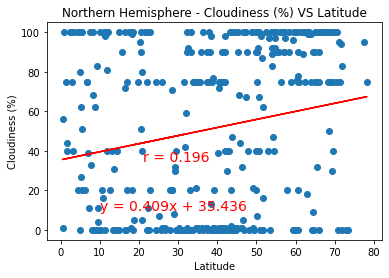

In [55]:
Latitude = NorthernHem["Latitude"]
Cloudiness = NorthernHem["Cloudiness"]

slope,intercept,rvalue,pvalue,stderr = st.linregress(Latitude, Cloudiness)
Regress_value = slope * Latitude + intercept
Equation = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
R = "r = " + str(round(rvalue,3))

plt.scatter(Latitude,Cloudiness)
plt.plot(Latitude,Regress_value,color = "red")
plt.annotate(Equation,(10,10),fontsize = 14,color = "red")
plt.annotate(R,(21,35),fontsize = 14,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) VS Latitude")
plt.savefig("Figures/Figure9.png")
plt.show()

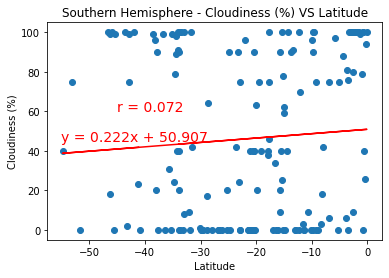

In [62]:
Latitude = SouthernHem["Latitude"]
Cloudiness = SouthernHem["Cloudiness"]

slope,intercept,rvalue,pvalue,stderr = st.linregress(Latitude, Cloudiness)
Regress_value = slope * Latitude + intercept
Equation = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
R = "r = " + str(round(rvalue,3))

plt.scatter(Latitude,Cloudiness)
plt.plot(Latitude,Regress_value,color = "red")
plt.annotate(Equation,(-55,45),fontsize = 14,color = "red")
plt.annotate(R,(-45,60),fontsize = 14,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) VS Latitude")
plt.savefig("Figures/Figure10.png")
plt.show()

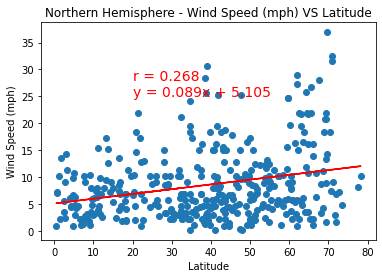

In [57]:
Latitude = NorthernHem["Latitude"]
WindSpeed = NorthernHem["Wind Speed"]

slope,intercept,rvalue,pvalue,stderr = st.linregress(Latitude, WindSpeed)
Regress_value = slope * Latitude + intercept
Equation = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
R = "r = " + str(round(rvalue,3))

plt.scatter(Latitude,WindSpeed)
plt.plot(Latitude,Regress_value,color = "red")
plt.annotate(Equation,(20,25),fontsize = 14,color = "red")
plt.annotate(R,(20,28),fontsize = 14,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) VS Latitude")
plt.savefig("Figures/Figure11.png")
plt.show()

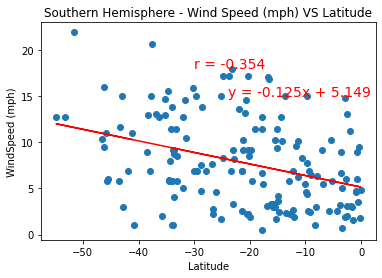

In [61]:
Latitude = SouthernHem["Latitude"]
WindSpeed = SouthernHem["Wind Speed"]

slope,intercept,rvalue,pvalue,stderr = st.linregress(Latitude, WindSpeed)
Regress_value = slope * Latitude + intercept
Equation = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
R = "r = " + str(round(rvalue,3))

plt.scatter(Latitude,WindSpeed)
plt.plot(Latitude,Regress_value,color = "red")
plt.annotate(Equation,(-24,15),fontsize = 14,color = "red")
plt.annotate(R,(-30,18),fontsize = 14,color = "red")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) VS Latitude")
plt.savefig("Figures/Figure12.png")
plt.show()